## Preprocessing

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the dataset
weblink = "https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv"
data = pd.read_csv(weblink)

# Display the first few rows of the dataframe
data.head()

2024-08-06 23:14:10.230822: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
print(data.columns)

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')


In [3]:
# Drop non-beneficial columns
data_df = data.drop(columns=['EIN', 'NAME'])

In [4]:
# Determine the number of unique values in each column
print(data_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [5]:
tp_cnt = data_df['APPLICATION_TYPE'].value_counts()
tp_cnt

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
apps_replace = list(tp_cnt[tp_cnt < 500].index)

# Replace in dataframe
for app in apps_replace:
    data['APPLICATION_TYPE'] = data['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
data['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_count = data['CLASSIFICATION'].value_counts()
class_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_app_df = pd.get_dummies(data, dtype=int)
numeric_app_df

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,1,5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,10531628,1,108590,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,10547893,1,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10553066,1,6692,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,10556103,1,142590,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,1,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,996010315,1,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,996012607,1,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,996015768,1,5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Split our preprocessed data into our features and target arrays
y = numeric_app_df['IS_SUCCESSFUL']
x = numeric_app_df.drop(['IS_SUCCESSFUL'], axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 78)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
node_layr_1 = 73
node_layr_2 = 58
input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = node_layr_1, activation = 'relu', input_dim = input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = node_layr_2, activation = 'relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()
     

/Users/josephcreanza/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 73)             │     1,436,494 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 58)             │         4,292 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            59 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,440,845 (5.50 MB)

 Trainable params: 1,440,845 (5.50 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
fitted_mod = nn.fit(X_train_scaled, y_train, epochs = 110)

Epoch 1/110
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8949 - loss: 0.2463
Epoch 2/110
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9604 - loss: 0.0995
Epoch 3/110
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9626 - loss: 0.0896
Epoch 4/110
804/804 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9613 - loss: 0.0890
Epoch 5/110
804/804 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9635 - loss: 0.0894
Epoch 6/110
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9618 - loss: 0.0898
Epoch 7/110
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9654 - loss: 0.0837
Epoch 8/110
804/804 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9626 - loss: 0.0889
Epoch 9/110
804/804 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9654 - loss: 0.0852
Epoch 10/110
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9666 - loss: 0.0819
Epoch 11/110
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9633 - loss: 0.0869
Epoch 12/110
804/804 ━━━━━

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 4ms/step - accuracy: 0.6831 - loss: 0.9828
Loss: 0.9828314185142517, Accuracy: 0.6831486821174622


<Axes: >

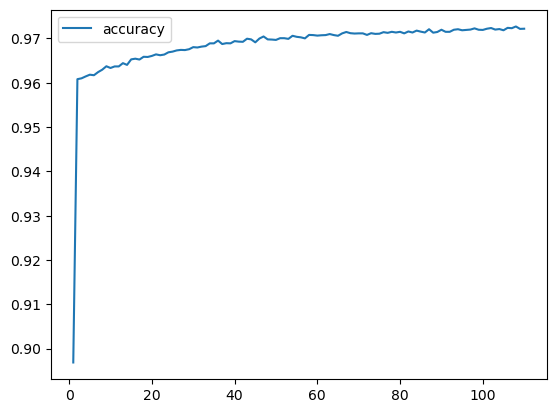

In [16]:
# Plot the accuracy
attempt1_df = pd.DataFrame(fitted_mod.history, index = range(1, len(fitted_mod.history['loss'])+1))
attempt1_df.plot(y = 'accuracy')

In [17]:
# Export our model to HDF5 file
nn.save("AlphabetSoupFunding_op2.h5")